In this Notebook we will visually display the correlation data obtained in "01_exploreBestParameters.ipynb". This will allow us to define the best optimization parameters to compute the final ensemble of 3D models.


# Libraries and functions

In [2]:
import sys

# Parameters to modify

In [3]:
## Data Paths (Location of the base folder downloaded from GitHub)
basePath = '/home/julen/TADdyn/SparseDataModelling/'

# This notebook requires further changes in the section "Generate file 
# with top parameters" to select the best paramteres for the modelling

# Run 

## Define additional paths 

In [4]:
scriptsPath = basePath + 'code/modellingScripts/'
GeneralOptimOutPath = basePath + 'optimization/'

## Import additional libraries 

In [5]:
sys.path.append(basePath + 'code')
import fileHandling
import plotting
sys.path.append(basePath + 'code/modellingScripts')
import Check_optimization

## Get matrix paths 

In [6]:
matricesLength, regionsAll, matrices = fileHandling.getMatricesPaths(basePath, starting='Matrix')

## Join output files 

To be more clean and have the results more handy, we will combine the correlation values splited in each parameter combination file into a single file per different dcutoff values.

In [7]:
for regi in regionsAll:
    print('--- %s ---' %regi)
    for cell in matrices:
        print('## %s ##' %(cell))
        scriptp = basePath + 'code/modellingScripts/optTXTparser.py'
        inPath = '/'.join(matrices[cell][regi].split('/')[:-1]) + '/'
        outPath = basePath + 'optimization/%s/%s/' %(cell, regi)
        # create folder if absent
        ! mkdir -p {outPath}
        # run script
        ! python {scriptp} -pi {inPath} -po {outPath} -j yes

--- b-globin ---
## nCD4 ##
/home/julen/TADdyn/SparseDataModelling/optimization/nCD4/b-globin/
## Ery ##
/home/julen/TADdyn/SparseDataModelling/optimization/Ery/b-globin/
C200.0 40
C100.0 40
C400.0 10
C300.0 30
## Mon ##
/home/julen/TADdyn/SparseDataModelling/optimization/Mon/b-globin/


## Check best dcutoff 

This step allows us to decide the optimal dcutoff for the modelling. In this example we just prepared the optimization in one interaction matrix (b-globin of Ery). See how the correlation values descend when increasing and decreasing the dcutoff value. In this case a dcutoff of 300 would be the best option, since its correlation values are higher than values above and below.   

NOTE: If we aim to compare matrices from different conditions we should select a dcutoff that fits best all the matrices, even if it is not the optimal in all the cases.

--- b-globin ---
## nCD4 ##
No files in nCD4_b-globin
## Ery ##
300.0	1


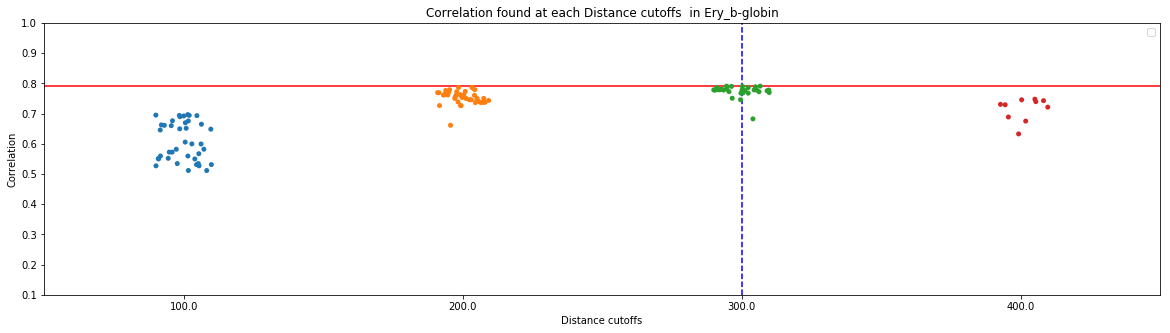

## Mon ##
No files in Mon_b-globin


In [8]:
for regi in regionsAll:
    print('--- %s ---' %regi)
    for cell in matrices:
        print('## %s ##' %(cell))
        optimPaths = [basePath + 'optimization/%s/%s/' %(cell, regi)]
        topCor = Check_optimization.checkAll(GeneralOptimOutPath, optimPaths, show_dcut=True, 
                                             dcut=False, topModels=False)

This step allows us to decide the optimal dcutoff for the modelling

## Check best maxdist 

Here we find that the best correlationw is obtained using a maxdist of 300 nm

--- b-globin ---
## nCD4 ##
No files in nCD4_b-globin
## Ery ##
300.0	1


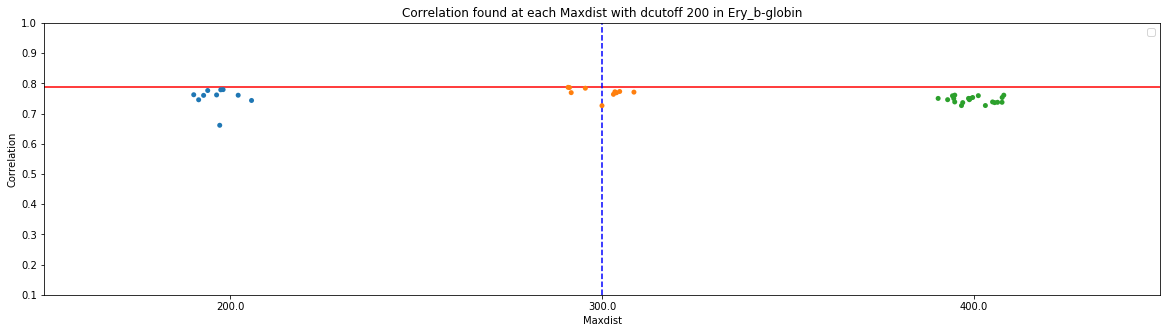

## Mon ##
No files in Mon_b-globin


In [9]:
topDuctoff = 200
for regi in regionsAll:
    print('--- %s ---' %regi)
    for cell in matrices:
        print('## %s ##' %(cell))
        optimPaths = [basePath + 'optimization/%s/%s/' %(cell, regi)]
        topCor = Check_optimization.checkAll(GeneralOptimOutPath, optimPaths, show_dcut=False, 
                                             dcut=topDuctoff, topModels=False)

## Generate file with top parameters 

We will create a file called modellinParams.txt in the optimization folder before the folders of each cell and region. This file will contain the parameters with the top correlation for the given dcutoff and maxdist. These files are created to facilitate the modelling process, but the selected parameter combinations should be checked prior to running the final modelling step.   

In the case of Ery, the best combination of paramteres for the final ensemble of models was set to:  
lowfreq = 0.0  
upfreq = 0.0  
maxdist = 300    
dcutoff = 200 # NOTE: this is set to 200 as is the best parameter for the comparative analyis with Mon and nCD4

In [10]:
## MODIFY THIS VALUES ACCORDING TO YOUR RESULTS
# gather top dcutoff and maxdist parameters
topDuctoff = 200
topMaxdist = 300


## get file with top optimization paramteres to model
inputPaths = [[],[]]
for regi in regionsAll:
    for cell in matrices:
        matrixPaths = matrices[cell][regi]
        optimPaths = basePath + 'optimization/%s/%s/' %(cell, regi)
        inputPaths[0] += [matrixPaths]
        inputPaths[1] += [optimPaths]
        

        
topModels = '%s_%s' %(topDuctoff, topMaxdist)
topCorrelations=Check_optimization.checkAll(GeneralOptimOutPath, [inputPaths[0],
                                                                  inputPaths[1]], 
                                            show_dcut=False, dcut=False, topModels=topModels)

/home/julen/TADdyn/SparseDataModelling/optimization/nCD4/b-globin/
/home/julen/TADdyn/SparseDataModelling/optimization/Ery/b-globin/
200.0 300.0
/home/julen/TADdyn/SparseDataModelling/optimization/Mon/b-globin/


In [11]:
print topCorrelations

{'Ery': {'b-globin': [300.0, 0.0, 0.0, 200.0, 0.7869859924901681]}}


The code bellow will produce a plot with the correlation values associated with the "topDuctoff" to assess the chosen top parameters. The best correlation should usually be surrounded by, or nearby to, other top ranked correlation values in the following plot

200.0


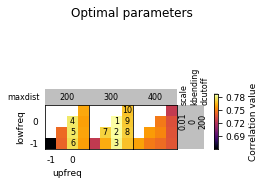

In [12]:
# Here we define the number of models we did in the optimization, and how many of them we kept
nmodels = 100
nkeep = 100  

for nm, matPath in enumerate(inputPaths[0]):
    plotting.optimPlot1(matPath, inputPaths[1][nm], nmodels = nmodels, 
                        nkeep = nkeep, ductoff=topDuctoff)
